#Gráficos

In [38]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
caminho = '/content/drive/MyDrive/DATA_EXPLORATORY/DNSE2017.csv'
sinasc = pd.read_csv(caminho, dtype=str)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Fazer o boxplot para idade da mãe e encontrar quais os registro de outliers.

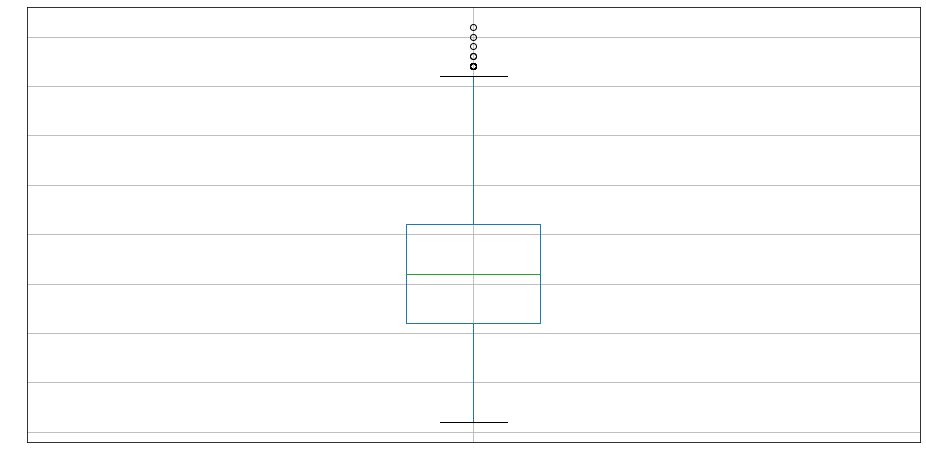

In [39]:
sinasc.IDADEMAE = pd.to_numeric(sinasc.IDADEMAE).astype(pd.Int64Dtype())

bpIDADEMAE = sinasc.boxplot(column=['IDADEMAE'], figsize=(16,8))
bpIDADEMAE.tick_params(colors='white')
bpIDADEMAE.xaxis.label.set_color('white')
bpIDADEMAE.yaxis.label.set_color('white')

2. Fazer o boxplot para o peso da criança e encontrar quais os registro de outliers.

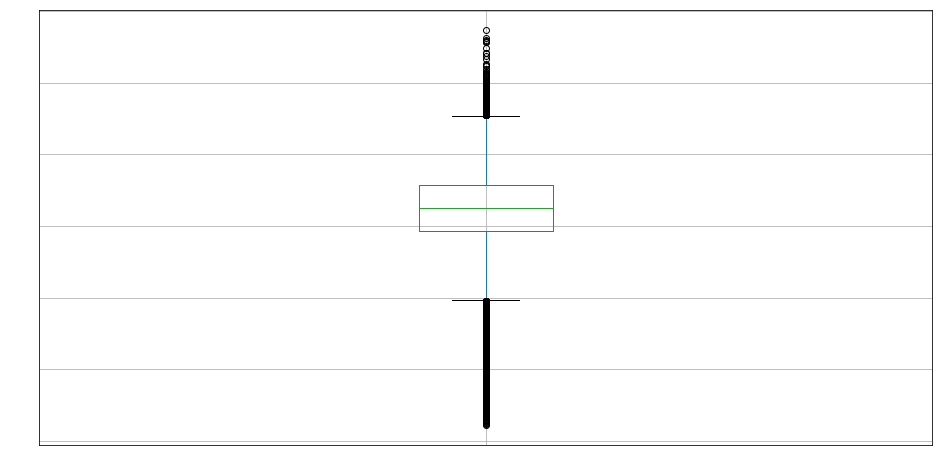

In [13]:
sinasc.PESO = pd.to_numeric(sinasc.PESO)

q = sinasc.IDADEMAE.quantile([0.25, 0.75]).values
limit_inf = q[0] - (q[1] - q[0]) * 1.5
limit_sup = q[1] + (q[1] - q[0]) * 1.5

sinasc_outliers = sinasc[(sinasc.IDADEMAE < limit_inf) | (sinasc.IDADEMAE > limit_sup)]
sinasc_outliers[['IDADEMAE']]

bpPESO = sinasc.boxplot(column=['PESO'], figsize=(16,8))
bpPESO.tick_params(colors='white')
bpPESO.xaxis.label.set_color('white')
bpPESO.yaxis.label.set_color('white')

3. Fazer o histograma da idade do pai

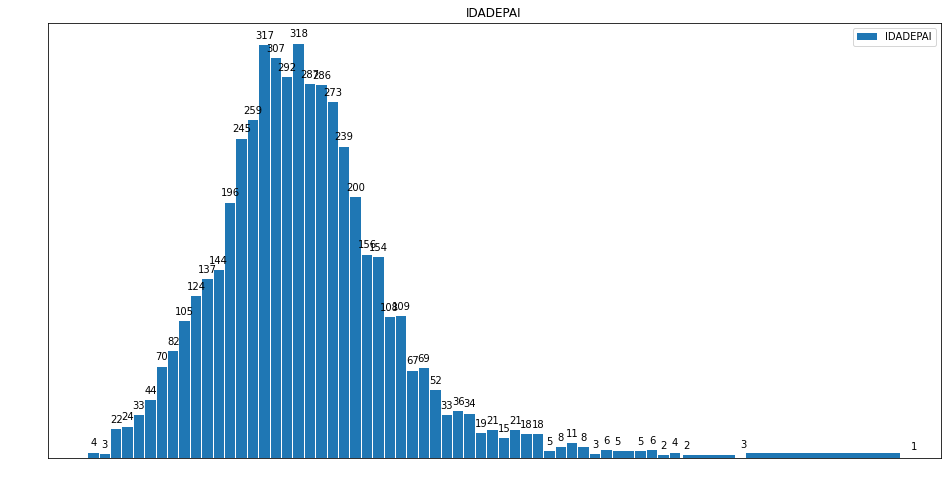

In [15]:
sinasc.IDADEPAI = pd.to_numeric(sinasc.IDADEPAI).astype(pd.Int64Dtype())

bins_values = sinasc.IDADEPAI.value_counts(sort=False)
hist = sinasc.hist(
    column='IDADEPAI', bins=sorted(bins_values.keys()), grid=False, figsize=(16,8), rwidth=0.9, legend=True
)

hist[0][0].tick_params(colors='white')
hist[0][0].xaxis.label.set_color('white')
hist[0][0].yaxis.label.set_color('white')
r = hist[0][0].set_xlabel('Idade')
r = hist[0][0].set_ylabel('Fequência')
r = hist[0][0].set_ylabel('Fequência')

x_ticks = []
for key, value in bins_values.items():
  x_ticks.append(key)
  hist[0][0].text(key+0.5, value+5, int(value), ha='center')
t = hist[0][0].set_xticks(x_ticks)


4. Representar visualmente os diferentes valores de APGAR1 e APGAR5

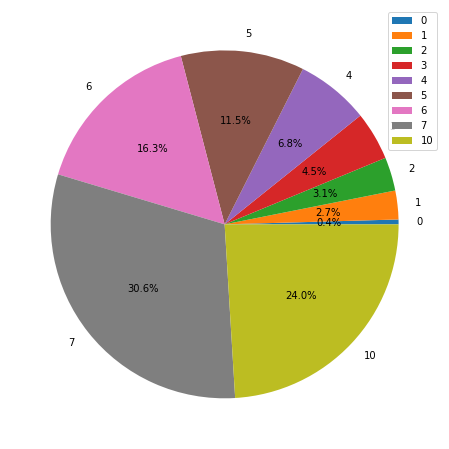

In [17]:
sinasc.APGAR1 = pd.to_numeric(sinasc.APGAR1).astype(pd.Int64Dtype())

grupo = sinasc[(sinasc.APGAR1 != 8) & (sinasc.APGAR1 != 9)].groupby(by='APGAR1').count()
pizza = grupo[['contador']].plot(y='contador',  kind='pie', autopct='%1.1f%%', figsize=(16,8))
r = pizza.set(xlabel='', ylabel='')

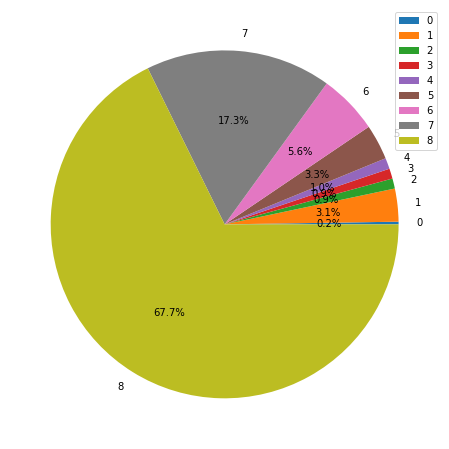

In [24]:
sinasc.APGAR5 = pd.to_numeric(sinasc.APGAR5).astype(pd.Int64Dtype())

grupo = sinasc[(sinasc.APGAR5 < 9)].groupby(by='APGAR5').count()
pizza = grupo[['contador']].plot(y='contador',  kind='pie', autopct='%1.1f%%', figsize=(16,8))
r = pizza.set(xlabel='', ylabel='')

5. Mostrar a dispersão entre idade do pai e idade da mãe

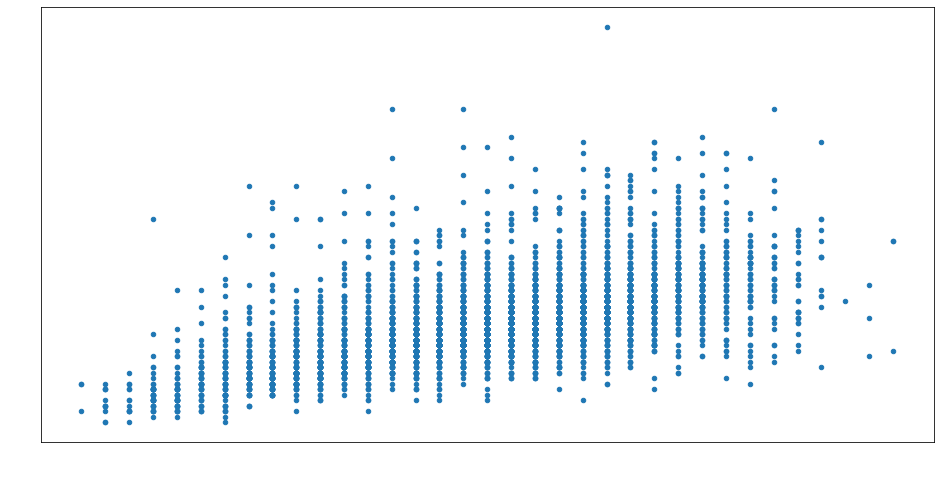

In [23]:
idades = sinasc[(sinasc.IDADEPAI.notna())][['IDADEMAE', 'IDADEPAI']]
disp = idades.plot(kind='scatter',x='IDADEMAE', y='IDADEPAI', figsize=(16,8))
disp.tick_params(colors='white')
disp.xaxis.label.set_color('white')
disp.yaxis.label.set_color('white')

6. Mostrar visualmente a comparação entre idade da mãe e idade do pai para as mães solteiras com menos de 18 anos

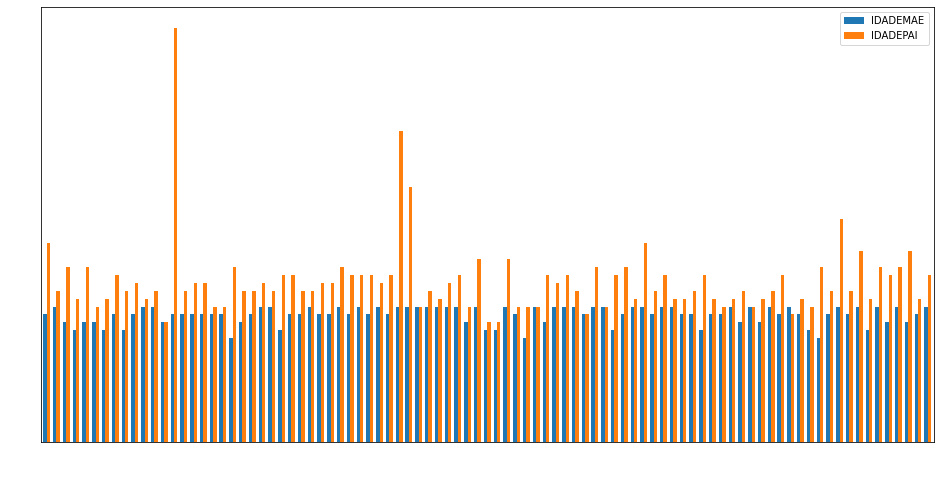

In [22]:
idades = sinasc[(sinasc.IDADEMAE < 18) & (sinasc.ESTCIVMAE== '1') & (sinasc.IDADEPAI.notna())][['IDADEMAE', 'IDADEPAI']]
barras = idades.plot(kind='bar', width=0.7, figsize=(16,8))
barras.tick_params(colors='white')
barras.xaxis.label.set_color('white')
barras.yaxis.label.set_color('white')
r = barras.set(xlabel='Observação', ylabel='Idade')

7. Comparar a frequência dos anos de escolaridade das mães para que residem na capital (Aracajú, CODMUNRES 2800308) e das mães em outras cidades (outros CODMUNRES).

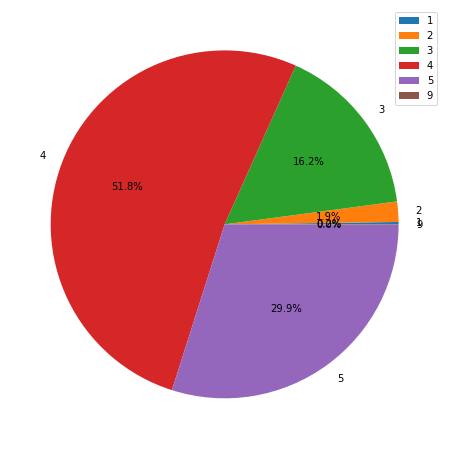

In [33]:
capital = sinasc[sinasc.CODMUNRES == '280030']
outras = sinasc[sinasc.CODMUNRES != '280030']

#Capital
grupo = capital.groupby(by='ESCMAE').count()
pizza = grupo[['contador']].plot(y='contador',  kind='pie', autopct='%1.1f%%', figsize=(16,8))
r = pizza.set(xlabel='', ylabel='')

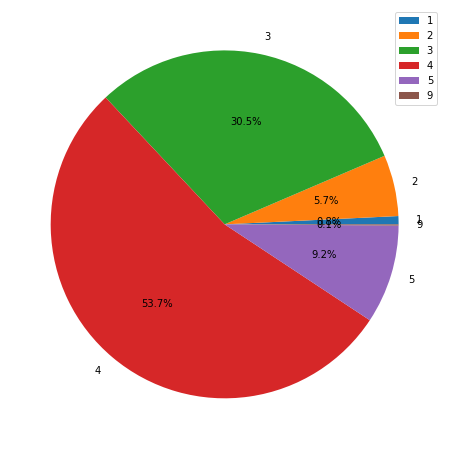

In [27]:
#Outros
grupo = outras.groupby(by='ESCMAE').count()
pizza = grupo[['contador']].plot(y='contador',  kind='pie', autopct='%1.1f%%', figsize=(20,8))
r = pizza.set(xlabel='', ylabel='')